# Plot ECCOv4r2 SST Field

A quick look at ECCOv4r2 SST field while highlighting the meta-data and generic coordinate structure in xarray.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import xgcm
import xmitgcm
import cartopy as cart
import cartopy.crs as ccrs
import ecco_v4_py as ecco

## Load 3D state and grab time mean SST 

In [2]:
data_dir = '../mitgcm_input/single_timestep/eccov4r2'

In [3]:
grid_dir = '../mitgcm_input/grids/llc90/'

In [4]:
ds = ecco.load_ecco_vars_from_mds(mds_var_dir=data_dir,mds_grid_dir=grid_dir)

read bin_llc:
../mitgcm_input/single_timestep/eccov4r2
../mitgcm_input/grids/llc90/


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/xmitgcm/mds_store.py:837: UserWarning: Couldn't find available_diagnostics.log in ../mitgcm_input/single_timestep/eccov4r2 or ../mitgcm_input/grids/llc90/. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))


In [5]:
ds

<xarray.Dataset>
Dimensions:   (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, tile: 13, time: 1)
Coordinates:
  * i         (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i_g       (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j         (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j_g       (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * tile      (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    timestep  (time) int64 732
  * time      (time) datetime64[ns] 1992-02-01
    XC        (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC        (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    XG        (tile, j_g, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YG        (tile, j_g, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    CS        (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    SN        (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Z         (k) >f8 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
    Zp1       (k_p1) >f8 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03 -6.134e+03
    Zu        (k_u) >f8 -10.0 -20.0 -30.0 ... -5.244e+03 -5.678e+03 -6.134e+03
    Zl        (k_l) >f8 0.0 -10.0 -20.0 ... -4.834e+03 -5.244e+03 -5.678e+03
    rA        (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dxG       (tile, j_g, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyG       (tile, j, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Depth     (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAz       (tile, j_g, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dxC       (tile, j, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyC       (tile, j_g, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAw       (tile, j, i_g) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAs       (tile, j_g, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    drC       (k_p1) float64 5.0 10.0 10.0 10.0 10.0 ... 399.0 422.0 445.0 222.5
    drF       (k) >f8 10.0 10.0 10.0 10.0 10.0 ... 364.5 387.5 410.5 433.5 456.5
    PHrefC    (k) >f4 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    PHrefF    (k_p1) >f4 0.0 98.1 196.2 294.3 ... 51448.547 55701.18 60179.445
    hFacC     (k, tile, j, i) >f8 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    hFacW     (k, tile, j, i_g) >f8 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    hFacS     (k, tile, j_g, i) >f8 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskC     (k, tile, j, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskW     (k, tile, j, i_g) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskS     (k, tile, j_g, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
Data variables:
    THETA     (time, k, tile, j, i) >f4 dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    SALT      (time, k, tile, j, i) >f4 dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    DRHODR    (time, k_l, tile, j, i) >f4 dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
Attributes:
    date_created:  Fri Mar 27 08:28:32 2020

### Get the time mean temperature at the surface.

There is only one time stamp, but this is just to show how the operations work...

In [6]:
sst = ds.THETA.isel(k=0).mean('time')
sst

<xarray.DataArray 'THETA' (tile: 13, j: 90, i: 90)>
dask.array<mean_agg-aggregate, shape=(13, 90, 90), dtype=float32, chunksize=(1, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int64 0
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC       (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    CS       (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    SN       (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Z        >f8 -5.0
    rA       (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Depth    (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    drF      >f8 10.0
    PHrefC   >f4 49.05
    hFacC    (tile, j, i) >f8 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    maskC    (tile, j, i) bool dask.array<chunksize=(1, 90, 90), meta=np.ndarray>

### Set some nice matplotlib defaults for figures

In [7]:
plt.rcParams.update({'figure.figsize':(12,6),'font.size':16})

### Default plot via ecco_v4_py package

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


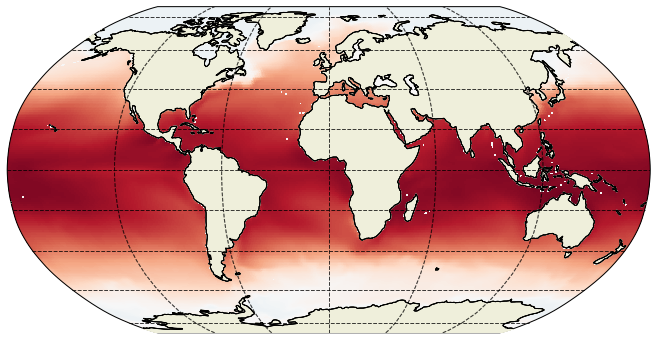

In [8]:
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,sst);

### Get fancy

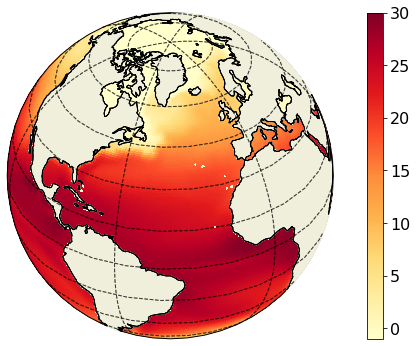

In [9]:
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,sst,
                              show_colorbar=True,cmap='YlOrRd',
                              projection_type='ortho',
                              cmin=-1,cmax=30,
                              user_lon_0=-40,
                              user_lat_0=35
                             );

### Add some salt...

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


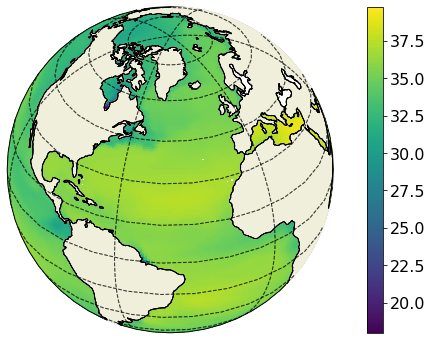

In [10]:
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,ds.SALT.where(ds.maskC).isel(k=0).mean('time'),
                              show_colorbar=True,
                              projection_type='ortho',
                              user_lon_0=-40,
                              user_lat_0=35
                             );

First notebook executed!